# Projet Wahou : Analyse de Couverture de livres

Ce projet avait pour but dans un premier temps,de creeer ou récuperer un dataset de couverture de livres ainsi que leur genre afin de prédire le genre d'un livre a partir de sa couverture, litterallement "juger un livre par sa couverture". Le projet c'est averé trop compliqué pour moi au final, j'ai donc opté pour un analyseur de couverture de livre, qui permet de savoir si une couverture appartient a une série A ou B, un exercice se rapprochant plus des concepts vu en cours.

In [1]:
# Mise en plaace du drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from os import listdir
from os.path import isfile, join

In [3]:
# Chargement des images

dataset_base_path = "/content/gdrive/My Drive/Colab Notebooks/Data/bookdataset/Datasets"
model_base_path = "/content/gdrive/My Drive/Colab Notebooks/Data/bookdataset/Models"

file_names = [f for f in listdir(dataset_base_path) if isfile(join(model_base_path, f))] 

print(str(len(file_names)) + ' images loaded')

58 images loaded


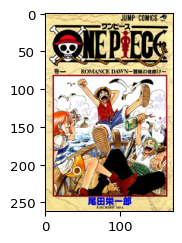

In [4]:
 #Vérification de l'import des images

import imageio
import imgaug as ia

image = imageio.imread("/content/gdrive/My Drive/Colab Notebooks/Data/bookdataset/Models/op.1.png")
ia.imshow(image)

index = 1
index = 2
index = 3
index = 4
index = 5
index = 6
index = 7
index = 8
index = 9
index = 10
index = 11
index = 12
index = 13
index = 14
index = 15
index = 16
index = 17
index = 18
index = 19
index = 20
index = 21
index = 22
index = 23
index = 24
index = 25
index = 26
index = 27
index = 28
index = 29
index = 30
index = 31
index = 32
index = 33
index = 34
index = 35
index = 36
index = 37
index = 38
index = 39
index = 40
index = 41
index = 42
index = 43
index = 44
index = 45
index = 46
index = 47
index = 48
index = 49
index = 50
index = 51
index = 52
index = 53
index = 54
index = 55
index = 56
index = 57
index = 58
Extracions données Entrainement et Test Fini


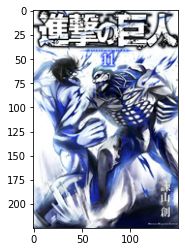

In [6]:
import cv2
import numpy as np
import sys
import os
import shutil
from matplotlib import pyplot as plt

# Le dataset que j'ai crée contient 58 images, 50 vont etre utilisés pour l'entrainement, et 8 pour la validation.
op_count = 0
snk_count = 0
training_size = 25
test_size = 4
training_images = []
training_labels = []
test_images = []
test_labels = []
size = 150
op_dir_train = dataset_base_path + "train/op/"
snk_dir_train = dataset_base_path + "train/snk/"
op_dir_val = dataset_base_path + "validation/op/"
snk_dir_val = dataset_base_path + "validation/snk/"

def make_dir(directory):
        if os.path.exists(directory):
            shutil.rmtree(directory)
        os.makedirs(directory)

make_dir(op_dir_train)
make_dir(snk_dir_train)
make_dir(op_dir_val)
make_dir(snk_dir_val)

def getZeros(number):
    if(number >= 10 and number < 100):
        return "0"
    if(number < 10):
        return "00"
    else:
        return ""

index = 0
for i, file in enumerate(file_names):
    index = index+1
    print("index = "+str(index))
    if file_names[i][0] == "o":
        op_count += 1
        image = cv2.imread(dataset_base_path+'/'+file)
        plt.imshow(image)
        image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
        if op_count <= training_size:
            training_images.append(image)
            training_labels.append(1)
            zeros = getZeros(op_count)
            cv2.imwrite(op_dir_train + "op" + str(zeros) + str(op_count) + ".jpg", image)
        if op_count > training_size and op_count <= training_size+test_size:
            test_images.append(image)
            test_labels.append(1)
            zeros = getZeros(op_count-25)
            cv2.imwrite(op_dir_val + "op" + str(zeros) + str(op_count-29) + ".jpg", image)
            
    if file_names[i][0] == "s":
        snk_count += 1
        image = cv2.imread(dataset_base_path+'/'+file)
        plt.imshow(image)
        image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
        if snk_count <= training_size :
            training_images.append(image)
            training_labels.append(0)
            zeros = getZeros(snk_count)
            cv2.imwrite(snk_dir_train + "snk" + str(zeros) + str(snk_count) + ".jpg", image)
        if snk_count > training_size and snk_count <= training_size+test_size:
            test_images.append(image)
            test_labels.append(0)
            zeros = getZeros(snk_count-25)
            cv2.imwrite(snk_dir_val + "snk" + str(zeros) + str(snk_count-29) + ".jpg", image)

    if op_count == training_size+test_size and snk_count == training_size+test_size:
        break

print("Extracions données Entrainement et Test Fini")

In [0]:
# Sauvegarde des données au format NPZ
np.savez(dataset_base_path + 'op_vs_snk_training_data.npz', np.array(training_images))
np.savez(dataset_base_path + 'op_vs_snk_training_labels.npz', np.array(training_labels))
np.savez(dataset_base_path + 'op_vs_snk_test_data.npz', np.array(test_images))
np.savez(dataset_base_path + 'op_vs_snk_test_labels.npz', np.array(test_labels))

In [0]:
# Fonction de chargement des données
import numpy as np

def load_data_training_and_test(datasetname):
    
    npzfile = np.load(dataset_base_path + datasetname + "_training_data.npz")
    train = npzfile['arr_0']
    
    npzfile = np.load(dataset_base_path + datasetname + "_training_labels.npz")
    train_labels = npzfile['arr_0']
    
    npzfile = np.load(dataset_base_path + datasetname + "_test_data.npz")
    test = npzfile['arr_0']
    
    npzfile = np.load(dataset_base_path + datasetname + "_test_labels.npz")
    test_labels = npzfile['arr_0']

    return (train, train_labels), (test, test_labels)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing import image

Using TensorFlow backend.


In [10]:
# Vérification du chargement des images d'entrainement
len(training_images)

50

In [43]:
#Vérification du chargement des images de test
len(test_images)

8

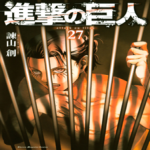

1 - Snk


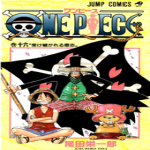

2 - Op


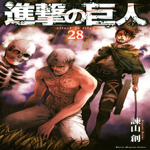

3 - Snk


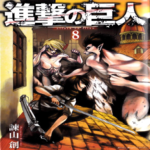

4 - Snk


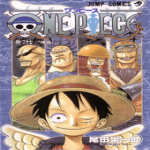

5 - Op


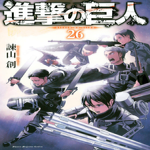

6 - Snk


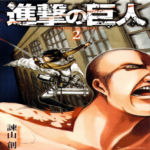

7 - Snk


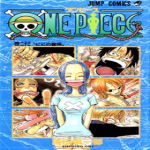

8 - Op


In [11]:
from google.colab.patches import cv2_imshow
for i in range(1,9):
    random = np.random.randint(0, len(training_images))
    cv2_imshow(training_images[random])
    if training_labels[random] == 0: 
        print(str(i) + " - Snk") #Si le Label est à 0, L'image est "SNK", Sinon "OP"
    else:
        print(str(i)+ " - Op")
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

In [12]:
# Preparation des données
(X_train, y_train), (X_test, y_test) = load_data_training_and_test("op_vs_snk") 

# Reshape
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

# Changement type image
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalisation
X_train /= 255
X_test /= 255

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50, 150, 150, 3)
(50, 1)
(8, 150, 150, 3)
(8, 1)


In [13]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 16
epochs = 25

img_rows = X_train[0].shape[0]
img_cols = X_train[1].shape[0]
input_shape = (img_rows, img_cols, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)       

In [14]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),
          shuffle=True)

Train on 50 samples, validate on 8 samples
Epoch 1/25
50/50 [==============================] - 2s 34ms/step - loss: 4.0921 - accuracy: 0.5600 - val_loss: 0.6832 - val_accuracy: 0.5000
Epoch 2/25
50/50 [==============================] - 1s 29ms/step - loss: 0.7379 - accuracy: 0.5000 - val_loss: 0.6534 - val_accuracy: 0.5000
Epoch 3/25
50/50 [==============================] - 1s 28ms/step - loss: 0.6061 - accuracy: 0.6600 - val_loss: 1.8008 - val_accuracy: 0.5000
Epoch 4/25
50/50 [==============================] - 1s 29ms/step - loss: 0.9384 - accuracy: 0.7600 - val_loss: 0.5817 - val_accuracy: 0.5000
Epoch 5/25
50/50 [==============================] - 1s 29ms/step - loss: 0.5047 - accuracy: 0.7600 - val_loss: 0.4657 - val_accuracy: 1.0000
Epoch 6/25
50/50 [==============================] - 1s 29ms/step - loss: 0.2891 - accuracy: 0.9000 - val_loss: 0.6210 - val_accuracy: 0.5000
Epoch 7/25
50/50 [==============================] - 1s 28ms/step - loss: 0.3916 - accuracy: 0.7800 - val_loss: 

# Accuracy a 1.0 surement par faible taille du dataset, a voir les resultats apres une augmentation des données.

In [15]:
print(model_base_path)
model.save(model_base_path + "snk_vs_op_V1.h5")

/content/gdrive/My Drive/Colab Notebooks/Data/bookdataset/Models


In [16]:
# Evaluation du modèle
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

8/8 [==============================] - 0s 9ms/step
Test loss: 0.2782299816608429
Test accuracy: 0.875


In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

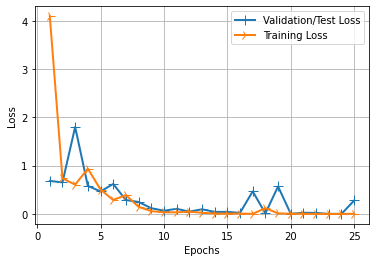

In [18]:
# Graph loss
import matplotlib.pyplot as plt



loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

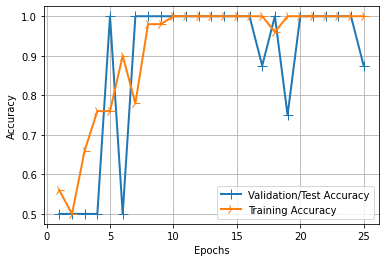

In [19]:
# Graph précision
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# DATA AUGMENTATION

In [38]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img 
import scipy
import pylab as pl
import matplotlib.cm as cm
%matplotlib inline

input_shape = (150, 150, 3)
img_width = 150
img_height = 150

nb_train_samples = 2000
nb_validation_samples = 1000 # Nombres tests
batch_size = 16
epochs = 25

train_data_dir = dataset_base_path + 'train'
validation_data_dir = dataset_base_path + 'validation'

# Generateur de donées pour test
validation_datagen = ImageDataGenerator(rescale = 1./255)

# Generateur de données pour entrainement
train_datagen = ImageDataGenerator(
      rescale = 1./255,              # Normalisation
      rotation_range = 30,           # Random rotation
      width_shift_range = 0.3,       # random epaississement
      height_shift_range = 0.3,      # random hauteur
      horizontal_flip = True,        # Random flip
      fill_mode = 'nearest')         # uses the fill mode nearest to fill gaps created by the above


train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle = True)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle = False)

Found 50 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [39]:
# Creation model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

print(model.summary())

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_31 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_32 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 34, 34, 64)       

In [40]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/25
125/125 [==============================] - 58s 460ms/step - loss: 0.6143 - accuracy: 0.6772 - val_loss: 0.8212 - val_accuracy: 0.6250
Epoch 2/25
125/125 [==============================] - 57s 455ms/step - loss: 0.3312 - accuracy: 0.8861 - val_loss: 0.2382 - val_accuracy: 0.8750
Epoch 3/25
125/125 [==============================] - 57s 453ms/step - loss: 0.2189 - accuracy: 0.9413 - val_loss: 0.2254 - val_accuracy: 0.8750
Epoch 4/25
125/125 [==============================] - 56s 451ms/step - loss: 0.1233 - accuracy: 0.9594 - val_loss: 0.6488 - val_accuracy: 0.7500
Epoch 5/25
125/125 [==============================] - 57s 453ms/step - loss: 0.1477 - accuracy: 0.9649 - val_loss: 0.5356 - val_accuracy: 0.8750
Epoch 6/25
125/125 [==============================] - 57s 454ms/step - loss: 0.0992 - accuracy: 0.9736 - val_loss: 1.0763 - val_accuracy: 0.8750
Epoch 7/25
125/125 [==============================] - 57s 459ms/step - loss: 0.1053 - accuracy: 0.9700 - val_loss: 1.5266 - val_ac

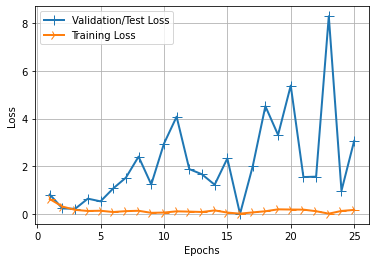

In [41]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

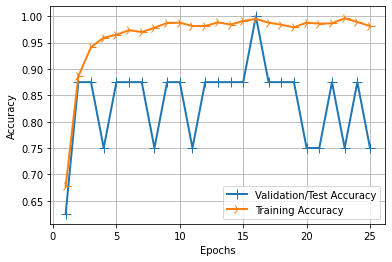

In [42]:
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Conclusion
Ce projet n'est pas celui prévu au départ, je pense avoir été trop ambitieux et ai perdu beaucoup de temps à essayer de faire quelque chose dont je n'était pas capable.

Concernant le projet, Je pense avoir globalement compris les concepts abordés en cours, les points m'ayant posé le plus de probleme fut la data augmentation (Et je crois que j'ai toujours un probleme la dessus, j'ai l'impression de ne pas avoir réussi a générer des images de validation sur ce projet).

Cependant j'aimerais mettre en place mon idée de base au courant de l'été avant la rentrée prochaine.